## Comparing descriptives

In [1]:
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from importlib import reload
import datetime
import time
from RunSilentlyDailyEtapasBuilder import RunSilentlyDailyEtapasBuilderClass
from matplotlib.dates import date2num

In [2]:
dates = ['2017-03-01','2017-03-05', '2017-07-19']

In [3]:
turnstile_means = []
turnstile_medians = []
turnstile_stds = []
turnstile_maxs = []

no_turnstile_means = []
no_turnstile_medians = []
no_turnstile_stds = []
no_turnstile_maxs = []

quantile = 0.97

tic = time.clock()

for date in dates:
    etapas_builder = RunSilentlyDailyEtapasBuilderClass(date)
    [processed_sorted_df, filtered_df, filtered_turnstile_df, filtered_no_turnstile_df]=etapas_builder.runCompleteProcess()
    
    turnstile_q = filtered_turnstile_df.diferencia_tiempo.quantile(quantile)
    no_turnstile_q = filtered_no_turnstile_df.diferencia_tiempo.quantile(quantile)    
    
    filtered_turnstile_q_df = filtered_turnstile_df[filtered_turnstile_df.diferencia_tiempo<=turnstile_q]
    filtered_no_turnstile_q_df = filtered_no_turnstile_df[filtered_no_turnstile_df.diferencia_tiempo<=no_turnstile_q]
    
    turnstile_means.append(filtered_turnstile_q_df['diferencia_tiempo_secs'].mean())
    turnstile_stds.append(filtered_turnstile_q_df['diferencia_tiempo_secs'].std())
    turnstile_medians.append(filtered_turnstile_q_df['diferencia_tiempo_secs'].quantile(0.50))
    turnstile_maxs.append(filtered_turnstile_q_df['diferencia_tiempo_secs'].max())
    
    no_turnstile_means.append(filtered_no_turnstile_q_df['diferencia_tiempo_secs'].mean())
    no_turnstile_stds.append(filtered_no_turnstile_q_df['diferencia_tiempo_secs'].std())    
    no_turnstile_medians.append(filtered_no_turnstile_q_df['diferencia_tiempo_secs'].quantile(0.50))
    no_turnstile_maxs.append(filtered_no_turnstile_q_df['diferencia_tiempo_secs'].max())
    del etapas_builder
    
toc = time.clock()  
toc-tic

Not found in turnstile database: 1614656
Not found in turnstile database: 656097
Not found in turnstile database: 1637796


49.980444524784765

* Plotting Means

In [4]:
colors = [(85,98,112),(78,205,196),(199,244,100),(255,107,107),(196,77,88)]
for i in range(len(colors)):
    r, g, b = colors[i]  
    colors[i] = (r / 255., g / 255., b / 255.)

width = 0.2

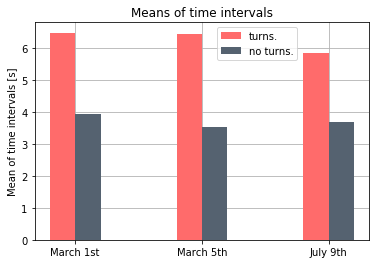

In [5]:
ind = np.arange(3)
fig, ax = plt.subplots()

p1 = ax.bar(ind, turnstile_means , width = width, color = colors[3], zorder=3)
p2 = ax.bar(ind+width, no_turnstile_means , width = width, color = colors[0],zorder=3)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('March 1st', 'March 5th', 'July 9th'))
ax.set_title('Means of time intervals')
ax.set_ylabel('Mean of time intervals [s]')
ax.grid(zorder=0)

plt.legend((p1[0],p2[0]), ('turns.','no turns.'),bbox_to_anchor=(0.8, 1))
plt.savefig('C:/Users/Tesista/Desktop/Evasion/03_report/02_Figs/3_meansComparison.pdf')

* Plotting std

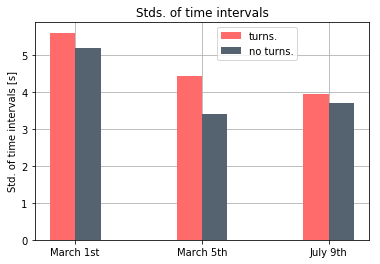

In [6]:
ind = np.arange(3)
fig, ax = plt.subplots()

p1 = ax.bar(ind, turnstile_stds , width = width, color = colors[3], zorder=3)
p2 = ax.bar(ind+width, no_turnstile_stds , width = width, color = colors[0],zorder=3)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('March 1st', 'March 5th', 'July 9th'))
ax.set_title('Stds. of time intervals')
ax.set_ylabel('Std. of time intervals [s]')
ax.grid(zorder=0)

plt.legend((p1[0],p2[0]), ('turns.','no turns.'),bbox_to_anchor=(0.8, 1))
plt.savefig('C:/Users/Tesista/Desktop/Evasion/03_report/02_Figs/3_stdsComparison.pdf')

* Plotting Medians

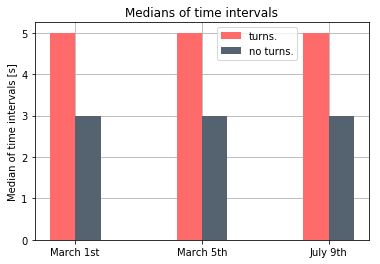

In [7]:
ind = np.arange(3)
fig, ax = plt.subplots()

p1 = ax.bar(ind, turnstile_medians , width = width, color = colors[3], zorder=3)
p2 = ax.bar(ind+width, no_turnstile_medians , width = width, color = colors[0],zorder=3)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('March 1st', 'March 5th', 'July 9th'))
ax.set_title('Medians of time intervals')
ax.set_ylabel('Median of time intervals [s]')
ax.grid(zorder=0)

plt.legend((p1[0],p2[0]), ('turns.','no turns.'),bbox_to_anchor=(0.8, 1))
plt.savefig('C:/Users/Tesista/Desktop/Evasion/03_report/02_Figs/3_mediansComparison.pdf')

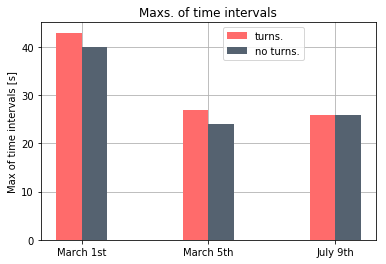

In [8]:
ind = np.arange(3)
fig, ax = plt.subplots()

p1 = ax.bar(ind, turnstile_maxs , width = width, color = colors[3], zorder=3)
p2 = ax.bar(ind+width, no_turnstile_maxs , width = width, color = colors[0],zorder=3)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('March 1st', 'March 5th', 'July 9th'))
ax.set_title('Maxs. of time intervals')
ax.set_ylabel('Max of time intervals [s]')
ax.grid(zorder=0)

plt.legend((p1[0],p2[0]), ('turns.','no turns.'),bbox_to_anchor=(0.8, 1))
plt.savefig('C:/Users/Tesista/Desktop/Evasion/03_report/02_Figs/3_maxsComparison.pdf')

### Closed